### This week lab is about Support Vector Machine SVM algorithm. We will use scikit-learn ML Pythpn library for this lab. 

In [1]:
# to install scikit-learn: pip install -U scikit-learn
# For other installation ways refer to: https://scikit-learn.org/stable/install.html
from sklearn import svm, datasets
import numpy as np
import matplotlib.pyplot as plt

`SVC` and `LinearSVC`  two classes in the svm module whch are capable of performing binary and multi-class classification on a dataset. `LinearSVC` is faster but only when the kernel is "Linear"  

In [2]:
# let's start with really simple example
X = [[0, 0], [1, 1]] # input 
Y = [0, 1] # target
# Define the SVM classifier
clf =svm.SVC()
# train the classifer on our data
clf = clf.fit(X, Y) 

In [3]:
# the model can then be used to predict the class of samples:
clf.predict([[2., 2.]])

array([1])

In [4]:
# SVMs decision function depends on some subset of the training data, called 
# the support vectors. Some properties of these support vectors can be found 
# in attributes support_vectors_, support_ and n_support_:

# get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [5]:
# get indices of support vectors
clf.support_

array([0, 1], dtype=int32)

In [6]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

#### Now let's train the SVM classfier with linear kernel using  SVC class on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

#### We will also show how to plot the decision surface for Linear SVM.

In [7]:
# these two functions are for plotting the decision surface of the classifier
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [8]:
# import some data 
iris = datasets.load_iris()
# Take the first two features.
X = iris.data[:, :2]
y = iris.target

In [9]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C)
# train the model 
linear_clf = clf.fit(X, y)

In [10]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

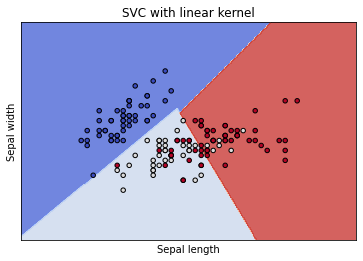

In [11]:
# Now let's plot the decision surface of the Linear SVM classifir on the 2D dataset
fig, ax = plt.subplots()
plot_contours(ax, linear_clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with linear kernel')

plt.show()

# Exercises 
### Now we want to use different kernels. We would like to implement the SVM classifiers using RBF kernel and the ploynomial (degree 3) kernel. And plot the decision surface of both 

In [12]:
# TODO: Train the SVM clasifier using RBF (“Gaussian”) kernel and plot the decision surface of it 
gamma = 0.7 # lets set gamma to be 0.7 but feel free to experiment with different values
rbf_clf = None
rbf_clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
rbf_clf = rbf_clf.fit(X, y)

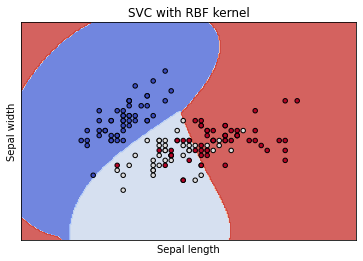

In [13]:
# Now let's plot the decision surface of the RBF SVM classifir on the 2D dataset
fig, ax = plt.subplots()
plot_contours(ax, rbf_clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with RBF kernel')

plt.show()

In [14]:
# TODO: Train the SVM clasifier using polynomial kernel and plot the decision surface of it 
gamma = "auto"
degree = 3 # feel free to experiment with different values
ploy_clf = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)
ploy_clf = ploy_clf.fit(X,y)

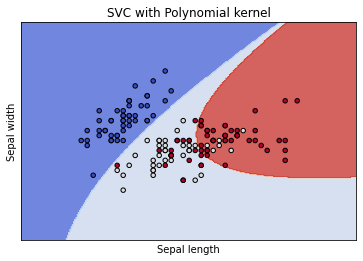

In [15]:
# Now let's plot the decision surface of the polynomial SVM classifir on the 2D dataset
fig, ax = plt.subplots()
plot_contours(ax, ploy_clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with Polynomial kernel')

plt.show()